# <font color=blue>TransE Algorithm</font>

**IGERT Trainees**: Roman Aguilera and Su Burtner <br>
**IGERT Mentor**: Yi Ding

##### Keywords: <font color=blue>embedding, multi-relational data, knowledge bases, Freebase</font>

### <font color=blue>Project Description</font>
    The goal of this project is to learn how to translate the TransE Algorithm presented in [this link](https://papers.nips.cc/paper/5071-translating-embeddings-for-modeling-multi-relational-data.pdf) into python source code.

### <font color=blue>Project Tasks</font>
    1. Data pre-processing: extract a subset of the Freebase data and import to python in the correct format & structures
    2. Algorithm implementation: translate a mathematical description of the algorithm in the original paper into python source code
    3. Visualization: plot the locations of the nodes over time
    
##### Software tools: <font color=blue>GitHub, jupyter</font>


### 1) Import libraries

In [3]:
import numpy as np
import pandas as pd

### 2) Read in the data and do some pre-processing
    - Aspects of the data: tab delimited
    - Contents include
    
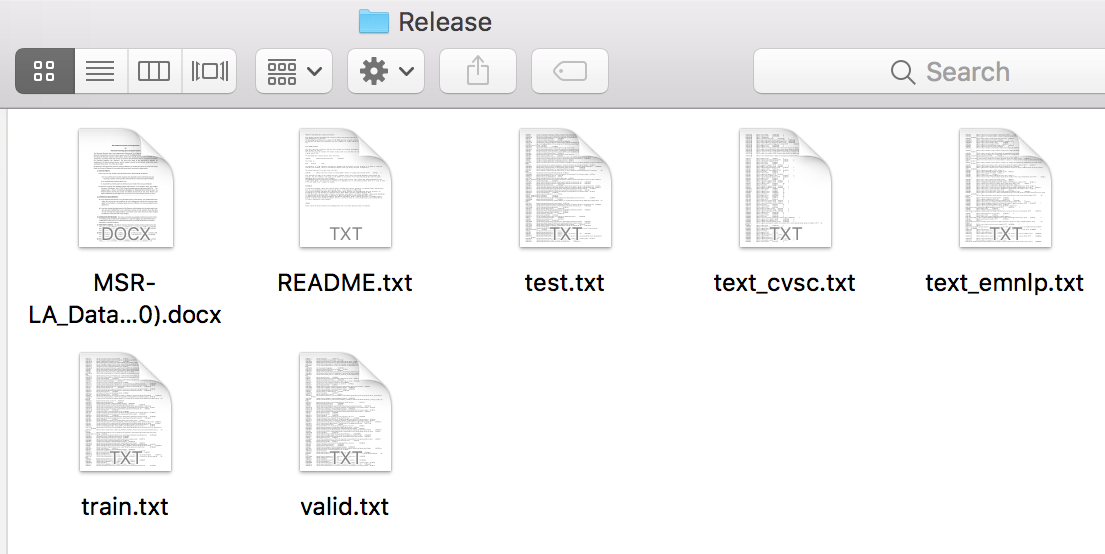
    
    - FYI: Actual entities and relationships on salinas at share/igert/student/sab00
    - We want to remove those relations that are too complicated, i.e., are more than just subj/rel/obj
    - We also need to join the sub/obj keys with their corresponding relations

In [41]:
base_dir = "/Users/sburtner/Documents/IGERT/Release/"
train_dat = pd.read_table(base_dir + "train.txt", sep="\t",
                          names=["subj", "rel", "obj"])
print("The training data contains", len(train_dat), "triples.")
train_dat.head(10)

The training data contains 272115 triples.


,subj,rel,obj
0,/m/027rn,/location/country/form_of_government,/m/06cx9
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8
5,/m/04nrcg,/soccer/football_team/current_roster./soccer/f...,/m/02sdk9v
6,/m/07nznf,/film/actor/film./film/performance/film,/m/014lc_
7,/m/02qyp19,/award/award_category/nominees./award/award_no...,/m/02d413
8,/m/0q9kd,/award/award_nominee/award_nominations./award/...,/m/0184jc
9,/m/03q5t,/music/performance_role/regular_performances./...,/m/07y_7


In [64]:
obama = train_dat[(train_dat["obj"] == "/m/02mjmr") |
                  (train_dat["obj"] == "/m/02mjmr")]
obama.head(10)

,subj,rel,obj
1669,/m/013zdg,/education/educational_degree/people_with_this...,/m/02mjmr
2227,/m/0f8l9c,/base/popstra/location/vacationers./base/popst...,/m/02mjmr
8849,/m/0d05fv,/base/popstra/celebrity/friendship./base/popst...,/m/02mjmr
15089,/m/01w5m,/education/educational_institution/students_gr...,/m/02mjmr
15154,/m/0d06vc,/base/culturalevent/event/entity_involved,/m/02mjmr
40409,/m/0151w_,/celebrities/celebrity/celebrity_friends./cele...,/m/02mjmr
45983,/m/0413cff,/film/film/personal_appearances./film/personal...,/m/02mjmr
47345,/m/02114t,/celebrities/celebrity/celebrity_friends./cele...,/m/02mjmr
78295,/m/02rjjll,/award/award_ceremony/awards_presented./award/...,/m/02mjmr
82602,/m/03f2_rc,/celebrities/celebrity/celebrity_friends./cele...,/m/02mjmr


### 3) Take a subset of the data based on the 3 most common triples